In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree


In [2]:
df=pd.read_csv("/content/Fertilizer Prediction.csv")
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [ ]:
df.shape

(99, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [ ]:
df.isnull().sum()

,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


In [3]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
df['Soil Type']=le.fit_transform(df['Soil Type'])
df['Crop Type']=le.fit_transform(df['Crop Type'])
df['Fertilizer Name']=le.fit_transform(df['Fertilizer Name'])

In [ ]:
df.dtypes

,0
Temparature,int64
Humidity,int64
Moisture,int64
Soil Type,int64
Crop Type,int64
Nitrogen,int64
Potassium,int64
Phosphorous,int64
Fertilizer Name,int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temparature,99.0,30.282828,3.502304,25.0,28.0,30.0,33.0,38.0
Humidity,99.0,59.151515,5.840331,50.0,54.0,60.0,64.0,72.0
Moisture,99.0,43.181818,11.271568,25.0,34.0,41.0,50.5,65.0
Soil Type,99.0,2.010101,1.410565,0.0,1.0,2.0,3.0,4.0
Crop Type,99.0,5.151515,3.140790,0.0,2.0,5.0,8.0,10.0
Nitrogen,99.0,18.909091,11.599693,4.0,10.0,13.0,24.0,42.0
Potassium,99.0,3.383838,5.814667,0.0,0.0,0.0,7.5,19.0
Phosphorous,99.0,18.606061,13.476978,0.0,9.0,19.0,30.0,42.0
Fertilizer Name,99.0,3.636364,1.950691,0.0,2.0,4.0,5.0,6.0


In [ ]:
df.corr()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
Temparature,1.000000,0.973164,0.091222,0.036595,0.135211,-0.033771,-0.023424,0.207545,0.045079
Humidity,0.973164,1.000000,0.091342,0.061744,0.130019,-0.060646,-0.003833,0.204044,0.008468
Moisture,0.091222,0.091342,1.000000,-0.053386,-0.155281,-0.095945,0.027727,0.009276,-0.058222
Soil Type,0.036595,0.061744,-0.053386,1.000000,-0.311288,-0.159595,0.065460,0.205794,-0.065404
Crop Type,0.135211,0.130019,-0.155281,-0.311288,1.000000,0.071803,0.025838,-0.187574,-0.047543
Nitrogen,-0.033771,-0.060646,-0.095945,-0.159595,0.071803,1.000000,-0.500087,-0.686971,0.774628
Potassium,-0.023424,-0.003833,0.027727,0.065460,0.025838,-0.500087,1.000000,0.089192,-0.824218
Phosphorous,0.207545,0.204044,0.009276,0.205794,-0.187574,-0.686971,0.089192,1.000000,-0.280311
Fertilizer Name,0.045079,0.008468,-0.058222,-0.065404,-0.047543,0.774628,-0.824218,-0.280311,1.000000


In [ ]:
features=df.columns[:-1]


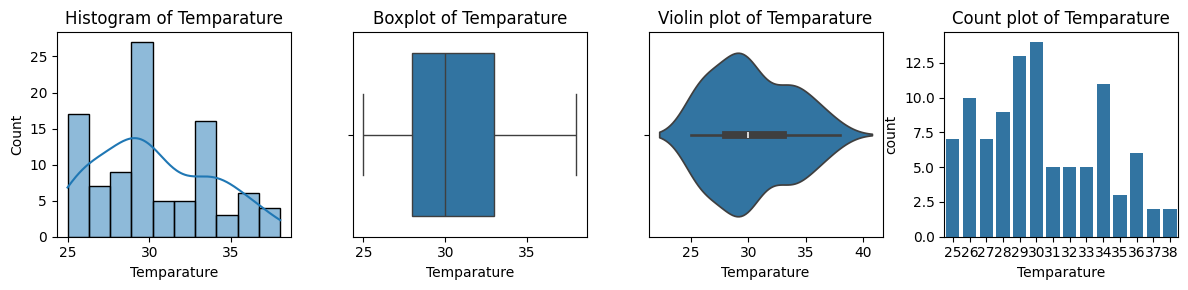

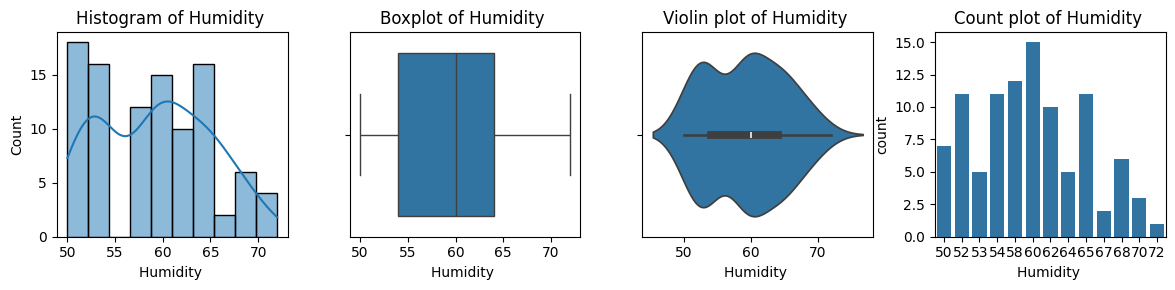

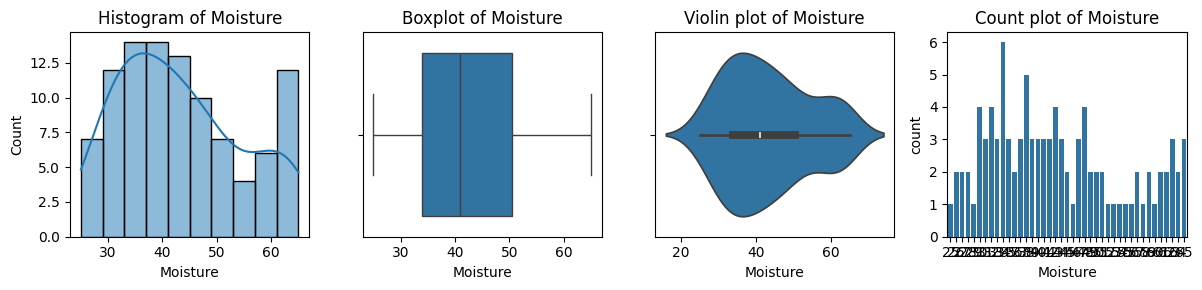

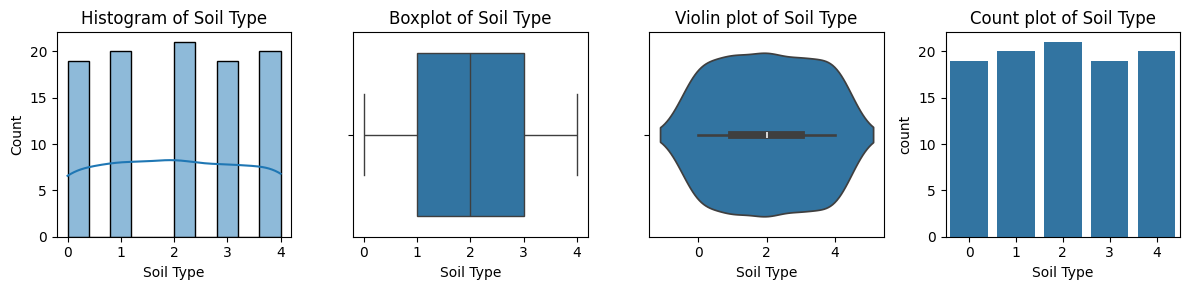

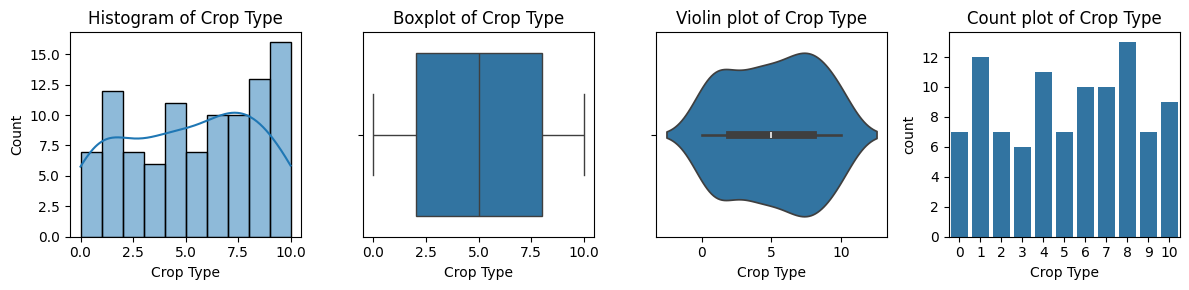

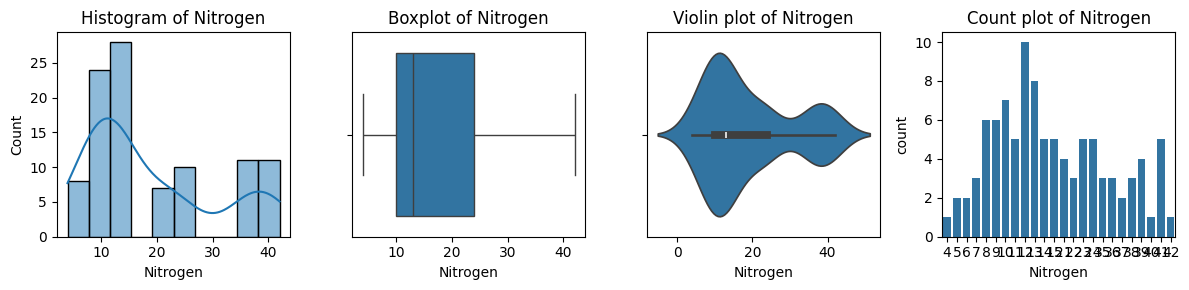

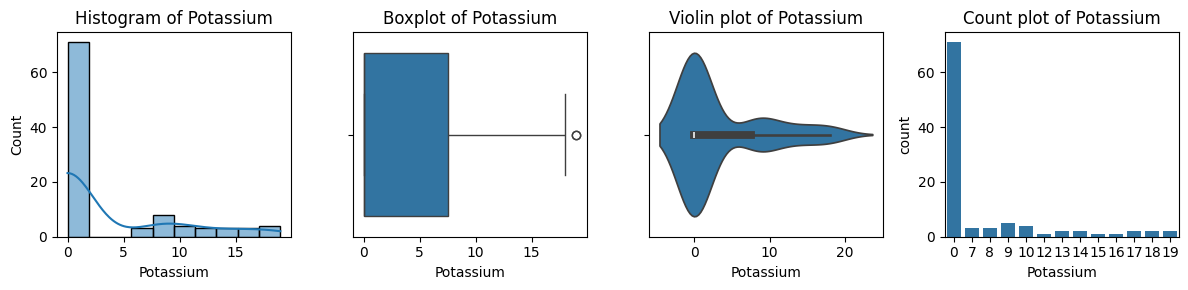

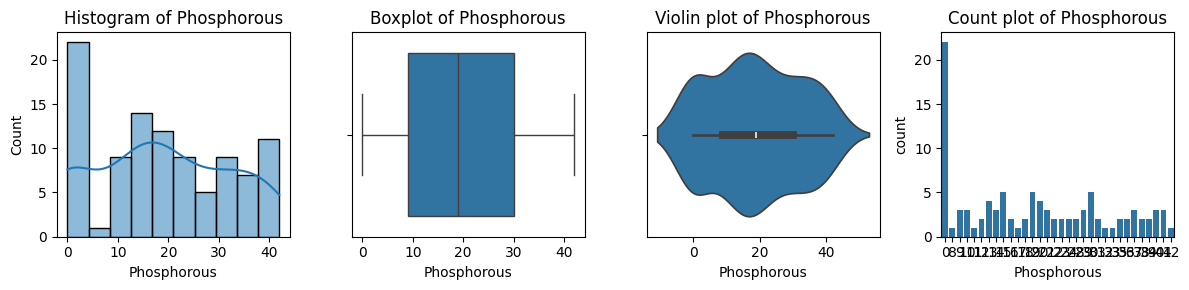

In [ ]:
for feature in features:
    plt.figure(figsize=(12, 3))

    # Histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[feature], kde=True, bins=10)
    plt.title(f'Histogram of {feature}')

    # Boxplot
    plt.subplot(1, 4, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

    # Violin plot
    plt.subplot(1, 4, 3)
    sns.violinplot(x=df[feature])
    plt.title(f'Violin plot of {feature}')

    plt.subplot(1, 4, 4)
    sns.countplot(x=df[feature])
    plt.title(f'Count plot of {feature}')

    plt.tight_layout()
    plt.show()

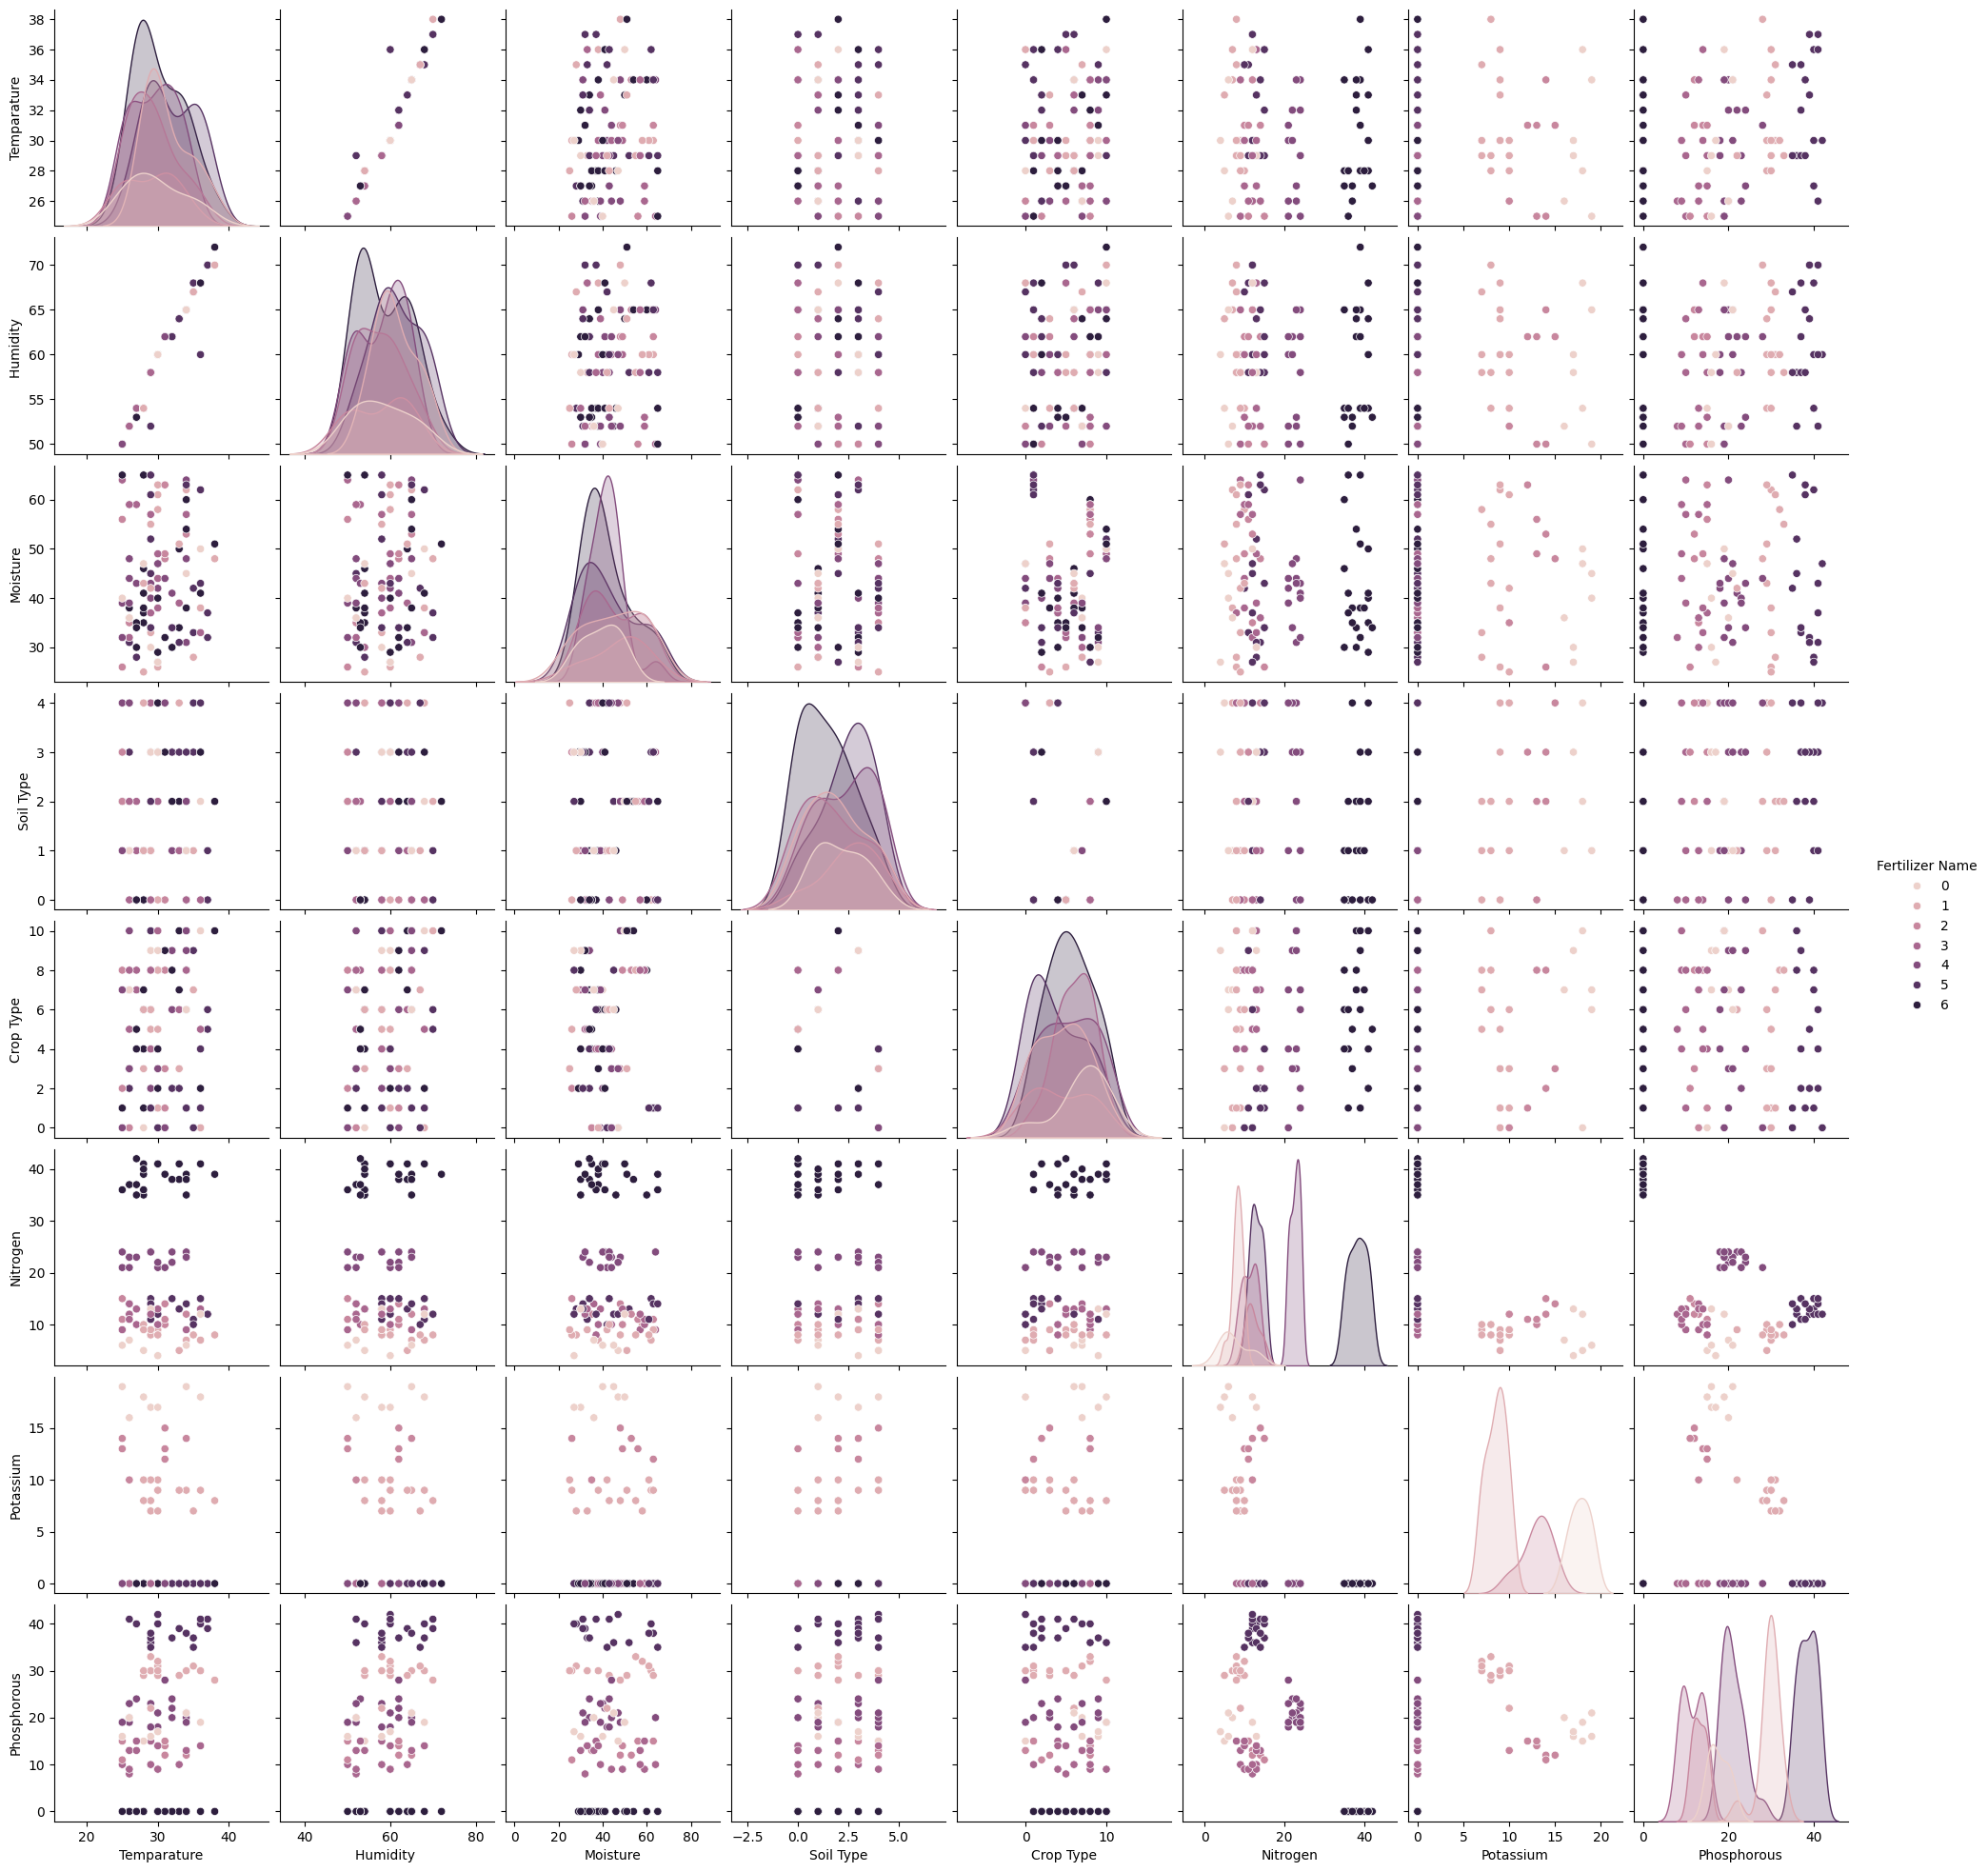

In [ ]:
sns.pairplot(df,hue='Fertilizer Name')

<Axes: >

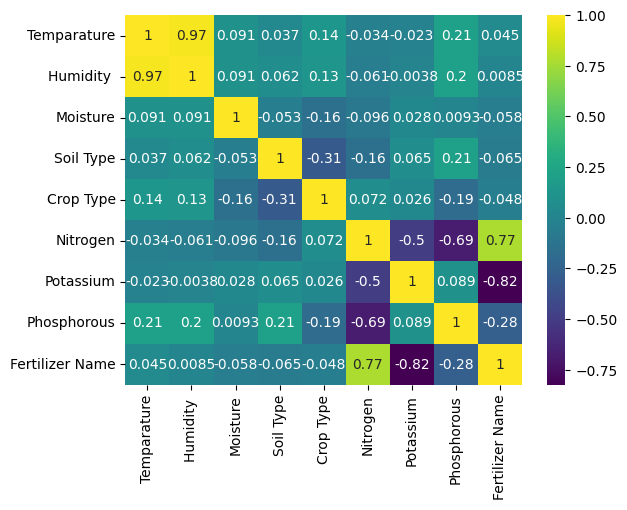

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<Axes: xlabel='Fertilizer Name', ylabel='count'>

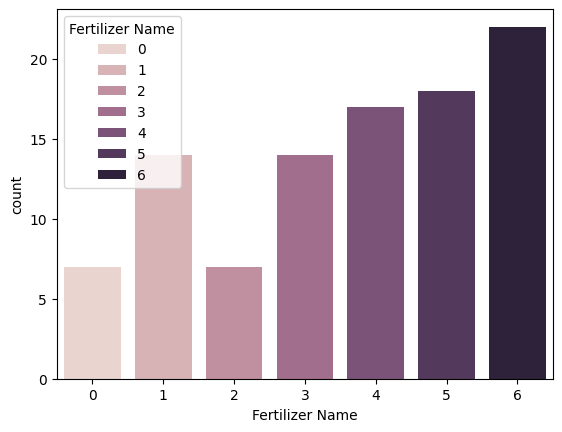

In [ ]:
sns.countplot(x='Fertilizer Name',data=df,hue='Fertilizer Name')

In [4]:
x=df.drop('Fertilizer Name',axis=1)
y=df['Fertilizer Name']


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [7]:
y_pred=dtc.predict(x_test)
y_pred

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 0, 6])

In [8]:
dtc.score(x_test,y_test)

1.0

In [9]:
dtc.score(x_train,y_train)

1.0

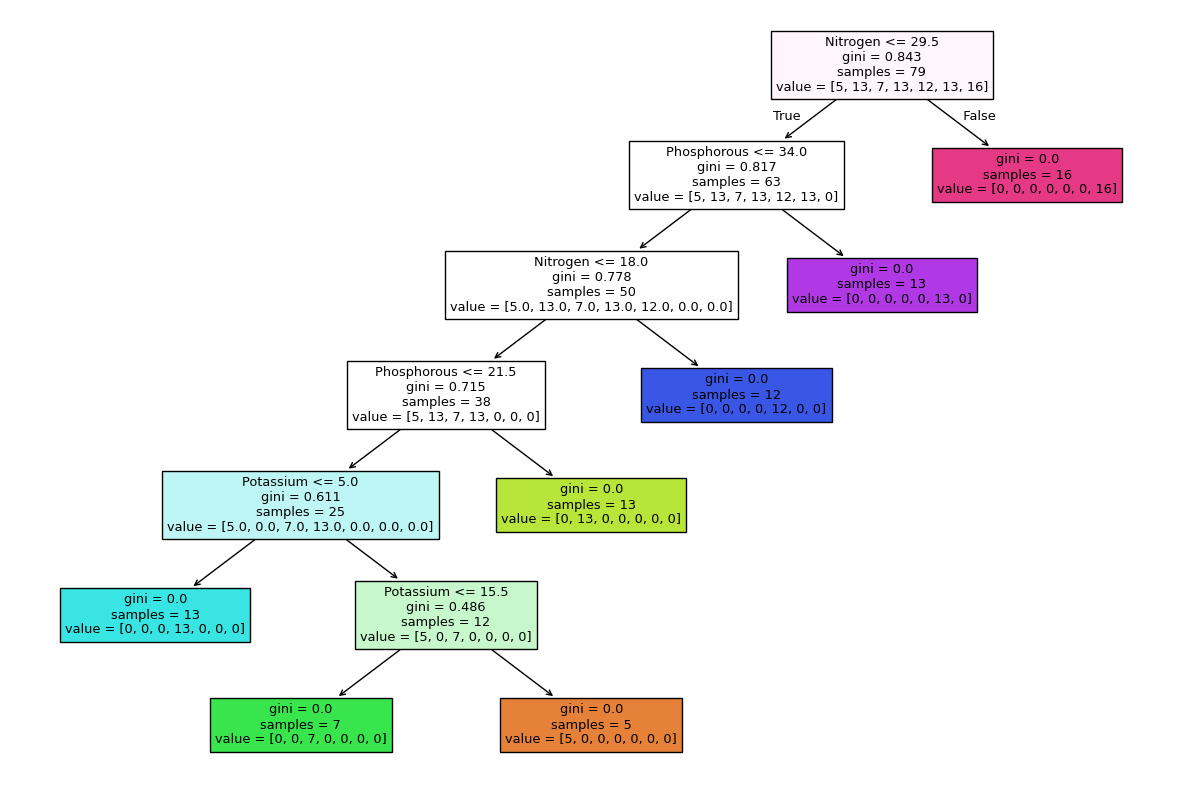

In [10]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dtc,filled=True,feature_names=x.columns)
plt.show()

In [11]:
# prompt: have to predicted the fertilizer name

import numpy as np
def predict_fertilizer(soil_type, crop_type, temperature, humidity, moisture, nitrogen, potassium, phosphorus):
  """
  Predicts the fertilizer name based on input parameters using the trained Decision Tree Classifier.

  Args:
    soil_type (int): Encoded soil type.
    crop_type (int): Encoded crop type.
    temperature (int): Temperature.
    humidity (int): Humidity.
    moisture (int): Moisture.
    nitrogen (int): Nitrogen content.
    potassium (int): Potassium content.
    phosphorus (int): Phosphorus content.

  Returns:
    str: The predicted fertilizer name (decoded).
  """
  input_data = np.array([[soil_type, crop_type, temperature, humidity, moisture, nitrogen, potassium, phosphorus]])
  predicted_encoded = dtc.predict(input_data)
  predicted_fertilizer = le.inverse_transform(predicted_encoded)
  return predicted_fertilizer[0]

predicted_fertilizer_name = predict_fertilizer(
    soil_type=1,
    crop_type=0,
    temperature=25,
    humidity=60,
    moisture=40,
    nitrogen=10,
    potassium=5,
    phosphorus=8
)
print(f"Predicted Fertilizer Name: {predicted_fertilizer_name}")


Predicted Fertilizer Name: 20-20


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
import pickle
with open('trained_model.pkl', 'wb') as f:
    pickle.dump({'model': dtc, 'label_encoder': le}, f)
